# College Scorecard API in Python

by Michael T. Moen

The College Scorecard API is an online tool hosted by the U.S. Department of Education that contains data concerning higher education institutions.

Please see the following resources for more information on API usage:

- Documentation
    - <a href="https://collegescorecard.ed.gov/data/api-documentation/" target="_blank">College Scorecard API Documentation</a>
- Data Reuse
    - <a href="https://www.ed.gov/about/ed-overview/required-notices/website-policies/copyright-status-notice-us-department-of-education" target="_blank">College Scorecard Copyright Status</a>
    - <a href="https://data.gov/privacy-policy/" target="_blank">Data\.gov Privacy Policy</a>

**_NOTE:_** The College Scorecard API limits requests to a maximum of 1000 requests per IP address per hour.

*These recipe examples were tested on May 5, 2025.*

## Setup

### Import Libraries

The following external libraries need to be installed into your enviornment to run the code examples in this tutorial:

- <a href="https://github.com/ipython/ipykernel" target="_blank">ipykernel</a>
- <a href="https://github.com/psf/requests" target="_blank">requests</a>
- <a href="https://github.com/theskumar/python-dotenv" target="_blank">python-dotenv</a>
- <a href="https://github.com/matplotlib/matplotlib" target="_blank">matplotlib</a>
- <a href="https://github.com/pandas-dev/pandas" target="_blank">pandas</a>
- <a href="https://github.com/numpy/numpy" target="_blank">numpy</a>

We import the libraries used in this tutorial below:

In [1]:
import requests
from pprint import pprint
from time import sleep
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from dotenv import load_dotenv
import os

### Import API Key

An API key is required to access the College Scorecard API. You can sign up for one at the <a href="https://collegescorecard.ed.gov/data/api-documentation#api-access-and-authentication" target="_blank">College Scorecard Website</a>.

We keep our API key in a `.env` file and use the `dotenv` library to access it. If you would like to use this method, create a `.env` file and add the following line to it:

```text
COLLEGE_SCORECARD_API_KEY=PUT_YOUR_API_KEY_HERE
```

In [2]:
load_dotenv()
try:
    API_KEY = os.environ["COLLEGE_SCORECARD_API_KEY"]
except KeyError:
    print("API key not found. Please set 'COLLEGE_SCORECARD_API_KEY' in your .env file.")

## 1. Get Names of All Institutions

To start, we'll use a basic query to find the names of all educational institutions recognized by the College Scorecard API.

All of the data for the API can be found using the `v1/schools` endpoint.

Fields in the College Scorecard API are accessed with a `<time>.<category>.<name>` sequence:
- `<time>` indicates the year of the data to be accessed. To access the most recent data, use `latest`.
- `<category>` and `<name>` can be found in the Data Dictionary file that can be downloaded from the API's documentation. The `<category>` of a field is given by the `dev-category` column in the `Institution_Data_Dictionary` section, and the `<name>` is given by the `developer-friendly name` column.

In [5]:
BASE_URL = 'http://api.data.gov/ed/collegescorecard/v1/schools'
params = {
    'fields': 'school.name',
    'api_key': API_KEY
}

names = requests.get(BASE_URL, params=params).json()

# Display resulting metadata
names['metadata']

{'page': 0, 'total': 6429, 'per_page': 20}

The `total` value indicates the total number results returned in this query. These results are paginated, so each query will return only the number indicated by `page_size`, which has a default value of 20 and a maximum value of 100. The page number is indicated by `page`, which by default is set to 0.

We can use a loop to create an API request for each page:

In [7]:
field = 'school.name'
sort_key = 'school.name'
page_size = 100

# Calculate the number of loops needed to page through every result
total_pages = (names['metadata']['total'] // page_size) + 1

institution_names = []

# Loop through each page of the dataset, sending a request for each page
for page_number in range(total_pages):

    params = {
        'fields': field,
        'page': page_number,
        'per_page': page_size,
        'sort': sort_key,
        'api_key': API_KEY
    }
    name_data = requests.get(BASE_URL, params=params).json()['results']

    for university in name_data:
        institution_names.append(university['school.name'])

    # Wait 1 second between API calls to be nicer on the host servers
    sleep(1)

# Display number of institution names found
len(institution_names)

6429

In [8]:
pprint(institution_names)

['A Better U Beauty Barber Academy',
 'A T Still University of Health Sciences',
 'Aaniiih Nakoda College',
 'ABC Adult School',
 'ABC Adult School - Cabrillo Lane',
 'ABC Beauty Academy',
 'ABCO Technology',
 'Abcott Institute',
 'Abilene Christian University',
 'Abilene Christian University-Undergraduate Online',
 'Abraham Baldwin Agricultural College',
 'Abraham Lincoln University',
 'Academia Medical Institute',
 'Academia Serrant Inc',
 'Academy College',
 'Academy Di Capelli -',
 'Academy Di Capelli-School of Cosmetology',
 'Academy for Careers and Technology',
 'Academy for Five Element Acupuncture',
 'Academy for Jewish Religion',
 'Academy for Jewish Religion California',
 'Academy for Nursing and Health Occupations',
 'Academy for Salon Professionals',
 'Academy of Allied Health Careers',
 'Academy of Art University',
 'Academy of Beauty Professionals',
 'Academy of Beauty Professionals',
 'Academy of Beauty Professionals',
 'Academy of Beauty Professionals',
 'Academy of Car

## 2. Get Names of All Universities

College Scorecard API requests can also take conditions to only select certain institutions.

In this example, we limit the results to only include institutions that award graduate degrees. In order to do this, we set the `degrees_awarded.highest` parameter to `4` to indicate that the highest degree awarded by an institution is a graduate degree. This information is within the `Institution_Data_Dictionary` section of the College Scorecard data disctionary.

In [ ]:
field = 'school.name'
sort_key = 'school.name'
page_size = 100

# Calculate the number of loops needed to page through every result
params = {
    'fields': field,
    'latest.school.degrees_awarded.highest': 4,
    'api_key': API_KEY
}
name_metadata = requests.get(BASE_URL, params=params).json()['metadata']
total_pages = (name_metadata['total'] // page_size) + 1

university_names = []

for page_number in range(total_pages):

    params = {
        'fields': field,
        'latest.school.degrees_awarded.highest': 4,
        'sort': sort_key,
        'page': page_number,
        'per_page': page_size,
        'api_key': API_KEY
    }
    name_data = requests.get(BASE_URL, params=params).json()['results']

    for university in name_data:
        university_names.append(university['school.name'])

    # Wait 1 second between API calls to be nicer on the host servers
    sleep(1)

# Display the number of university names found
len(university_names)

1985

In [10]:
pprint(university_names)

['A T Still University of Health Sciences',
 'Abilene Christian University',
 'Abraham Lincoln University',
 'Academy for Five Element Acupuncture',
 'Academy for Jewish Religion',
 'Academy for Jewish Religion California',
 'Academy of Art University',
 'Academy of Chinese Culture and Health Sciences',
 'Academy of Vocal Arts',
 'Acupuncture and Integrative Medicine College-Berkeley',
 'Acupuncture and Massage College',
 'Adams State University',
 'Adelphi University',
 'Adler Graduate School',
 'Adler University',
 'Adrian College',
 'AdventHealth University',
 'Agnes Scott College',
 'Air Force Institute of Technology-Graduate School of Engineering & '
 'Management',
 'Alabama A & M University',
 'Alabama College of Osteopathic Medicine',
 'Alabama State University',
 'Alaska Pacific University',
 'Albany College of Pharmacy and Health Sciences',
 'Albany Law School',
 'Albany Medical College',
 'Albany State University',
 'Albert Einstein College of Medicine',
 'Albertus Magnus Col

## 3. Find Number of Universities by State

The `school.state_fips` data element contains a number that corresponds to each state. This mapping is given below:

In [11]:
states = {
    1: 'Alabama', 2: 'Alaska', 4: 'Arizona', 5: 'Arkansas', 6: 'California', 8: 'Colorado',
    9: 'Connecticut', 10: 'Delaware', 11: 'District of Columbia', 12: 'Florida', 13: 'Georgia',
    15:	'Hawaii', 16: 'Idaho', 17: 'Illinois', 18: 'Indiana', 19: 'Iowa', 20: 'Kansas',
    21:	'Kentucky', 22: 'Louisiana', 23: 'Maine', 24: 'Maryland', 25: 'Massachusetts',
    26:	'Michigan', 27: 'Minnesota', 28: 'Mississippi', 29: 'Missouri', 30: 'Montana',
    31:	'Nebraska', 32: 'Nevada', 33: 'New Hampshire', 34: 'New Jersey', 35: 'New Mexico',
    36:	'New York', 37: 'North Carolina', 38: 'North Dakota', 39: 'Ohio', 40: 'Oklahoma',
    41:	'Oregon', 42: 'Pennsylvania', 44: 'Rhode Island', 45: 'South Carolina',
    46:	'South Dakota', 47: 'Tennessee', 48: 'Texas', 49: 'Utah', 50: 'Vermont',
    51: 'Virginia', 53: 'Washington', 54: 'West Virginia', 55: 'Wisconsin', 56: 'Wyoming',
    60: 'American Samoa', 64: 'Federated States of Micronesia', 66: 'Guam',
    69: 'Northern Mariana Islands', 70: 'Palau', 72: 'Puerto Rico', 78: 'Virgin Islands'
}

Using this mapping, we can find the number of universities in each state:

In [15]:
field = 'latest.school.state_fips'
page_size = 100

# Calculate the number of loops needed to page through every result
params = {
    'latest.school.degrees_awarded.highest': 4,
    'fields': field,
    'api_key': API_KEY
}
name_metadata = requests.get(BASE_URL, params=params).json()['metadata']
total_pages = (name_metadata['total'] // page_size) + 1

state_freq = {}

for page_number in range(total_pages):

    params = {
        'latest.school.degrees_awarded.highest': 4,
        'fields': field,
        'page': page_number,
        'per_page': page_size,
        'api_key': API_KEY
    }
    state_data = requests.get(BASE_URL, params=params).json()['results']

    for university in state_data:
        state = states[university['latest.school.state_fips']]
        state_freq[state] = state_freq.get(state, 0) + 1
    
    # Wait 1 second between API calls to be nicer on the host servers
    sleep(1)

Now, we can sort and display the results:

In [16]:
sorted_states = sorted(state_freq.items(), key=lambda x: x[1], reverse=True)

for state_name, num_universities in sorted_states:
    print(f'{state_name}: {num_universities}')

California: 201
New York: 154
Pennsylvania: 112
Texas: 103
Illinois: 79
Florida: 75
Massachusetts: 73
Ohio: 69
North Carolina: 57
Missouri: 55
Virginia: 53
Indiana: 50
Georgia: 49
Tennessee: 47
Puerto Rico: 47
Michigan: 46
Minnesota: 39
New Jersey: 38
Wisconsin: 37
South Carolina: 35
Alabama: 32
Kentucky: 30
Maryland: 29
Colorado: 28
Iowa: 28
Washington: 28
Connecticut: 27
Louisiana: 27
Oregon: 26
Kansas: 25
Oklahoma: 25
Arizona: 23
Arkansas: 20
Nebraska: 20
West Virginia: 18
District of Columbia: 16
Maine: 16
Mississippi: 16
South Dakota: 15
New Hampshire: 14
Utah: 14
New Mexico: 12
Rhode Island: 12
Vermont: 12
North Dakota: 10
Idaho: 9
Montana: 9
Hawaii: 7
Nevada: 6
Delaware: 5
Alaska: 4
Wyoming: 1
Guam: 1
Virgin Islands: 1


## 4. Retrieving Multiple Data Points in a Single Query

The following example uses multiple conditions and multiple fields. The conditions in the query are separated by `&` while the fields are separated by `,`.

In [18]:
# Use .join to add ',' between the elements in the list of fields
fields = ','.join([
    'school.name',
    'latest.admissions.admission_rate.overall',
    'latest.student.size',
    'latest.cost.tuition.out_of_state',
    'latest.cost.tuition.in_state',
    'latest.student.demographics.median_hh_income',
    'latest.school.endowment.begin'
])
page_size = 100
sort_key = 'school.name'

# Calculate the number of loops needed to page through every result
params = {
    'fields': fields,
    'latest.school.degrees_awarded.highest': 4,
    'latest.student.size__range': '1000..', # Schools with 1000 or more students
    'api_key': API_KEY
}
name_metadata = requests.get(BASE_URL, params=params).json()['metadata']
total_pages = (name_metadata['total'] // page_size) + 1

rows = []

for page_number in range(total_pages):

    params = {
        'fields': fields,
        'latest.school.degrees_awarded.highest': 4,
        'latest.student.size__range': '1000..', # Schools with 1000 or more students
        'page': page_number,
        'per_page': page_size,
        'sort': sort_key,
        'api_key': API_KEY
    }
    api_data = requests.get(BASE_URL, params=params).json()['results']

    for university in api_data:
        row = [
            university['school.name'],
            university['latest.admissions.admission_rate.overall'],
            university['latest.student.size'],
            university['latest.cost.tuition.out_of_state'],
            university['latest.cost.tuition.in_state'],
            university['latest.student.demographics.median_hh_income'],
            university['latest.school.endowment.begin']
        ]
        rows.append(row)
    
    # Wait 1 second between API calls to be nicer on the host servers
    sleep(1)

columns = ['Name', 'Admission Rate', 'Size', 'Tuition Out of State', 'Tuition In State',
           'Median Household Income', 'Endowment']
df = pd.DataFrame(rows, columns=columns)

# Display the dataframe
df

Name  Admission Rate  Size  \
0       Abilene Christian University          0.6388  3129   
1          Academy of Art University             NaN  4131   
2             Adams State University             NaN  1239   
3                 Adelphi University          0.7751  5077   
4                     Adrian College          0.6837  1635   
...                              ...             ...   ...   
1145  Xavier University of Louisiana          0.7448  2534   
1146                 Yale University          0.0450  6811   
1147              Yeshiva University          0.6375  2942   
1148    York College of Pennsylvania          0.9420  3187   
1149     Youngstown State University          0.8032  7340   

      Tuition Out of State  Tuition In State  Median Household Income  \
0                  42380.0           42380.0                  67136.0   
1                  28024.0           28024.0                  74015.0   
2                  21848.0            9776.0                  50726.0   
3                  47290.0           47290.0                  80864.0   
4                  40556.0           40556.0                  66915.0   
...                    ...               ...                      ...   
1145               27868.0           27868.0                  55657.0   
1146               64700.0           64700.0                  75345.0   
1147               49900.0           49900.0                  78671.0   
1148               24606.0           24606.0                  73378.0   
1149               11151.0           10791.0                  51307.0   

         Endowment  
0     6.055984e+08  
1              NaN  
2     6.267400e+04  
3     2.123457e+08  
4     4.106072e+07  
...            ...  
1145  1.627134e+08  
1146  4.138326e+10  
1147  5.183480e+08  
1148  1.709745e+08  
1149  3.175548e+08  

[1150 rows x 7 columns]

We can query the resulting dataframe to find the data for specific universities:

In [19]:
df[df['Name'] == 'The University of Alabama']

Name  Admission Rate   Size  Tuition Out of State  \
829  The University of Alabama          0.7582  32323               33200.0   

     Tuition In State  Median Household Income     Endowment  
829           11900.0                  57928.0  1.144633e+09

We can also query the dataframe to find the data for universities that satisfy certain conditions:

In [20]:
df[df['Admission Rate'] < 0.1]

Name  Admission Rate   Size  \
95                               Brown University          0.0523   7273   
104            California Institute of Technology          0.0314   1023   
183   Columbia University in the City of New York          0.0423   8899   
196                            Cornell University          0.0816  15935   
215                             Dartmouth College          0.0623   4367   
235                               Duke University          0.0678   6417   
343                            Harvard University          0.0345   7755   
391                      Johns Hopkins University          0.0756   5617   
467         Massachusetts Institute of Technology          0.0474   4571   
547                           New York University          0.0941  29430   
564                       Northeastern University          0.0565  15719   
576                       Northwestern University          0.0715   8960   
629                          Princeton University          0.0450   5579   
651                               Rice University          0.0788   4562   
760                           Stanford University          0.0391   7841   
888          University of California-Los Angeles          0.0873  33040   
899                         University of Chicago          0.0479   7540   
999                    University of Pennsylvania          0.0587  10768   
1069                        Vanderbilt University          0.0628   7143   
1133                             Williams College          0.0999   2060   
1146                              Yale University          0.0450   6811   

      Tuition Out of State  Tuition In State  Median Household Income  \
95                 68230.0           68230.0                  79027.0   
104                63255.0           63255.0                  81448.0   
183                69045.0           69045.0                  76971.0   
196                66014.0           66014.0                  80346.0   
215                65739.0           65739.0                  79834.0   
235                65805.0           65805.0                  78468.0   
343                59076.0           59076.0                  76879.0   
391                63340.0           63340.0                  81539.0   
467                60156.0           60156.0                  77426.0   
547                60438.0           60438.0                  82106.0   
564                63141.0           63141.0                  80190.0   
576                65997.0           65997.0                  81811.0   
629                59710.0           59710.0                  81428.0   
651                58128.0           58128.0                  77707.0   
760                62484.0           62484.0                  80275.0   
888                44524.0           13747.0                  72896.0   
899                66939.0           66939.0                  74573.0   
999                66104.0           66104.0                  78252.0   
1069               63946.0           63946.0                  76279.0   
1133               64860.0           64860.0                  77966.0   
1146               64700.0           64700.0                  75345.0   

         Endowment  
95    6.141243e+09  
104   3.390504e+09  
183   1.327985e+10  
196   9.349247e+09  
215   8.065743e+09  
235   1.211626e+10  
343   5.087768e+10  
391   8.244472e+09  
467   2.460081e+10  
547   5.235504e+09  
564   1.434086e+09  
576   1.087985e+10  
629   3.512622e+10  
651   7.844941e+09  
760   3.633879e+10  
888   2.903804e+09  
899   8.569802e+09  
999   2.072435e+10  
1069  1.020607e+10  
1133  3.341413e+09  
1146  4.138326e+10

In [21]:
df[df['Endowment'] > 1.0e+10]

Name  Admission Rate   Size  \
183   Columbia University in the City of New York          0.0423   8899   
235                               Duke University          0.0678   6417   
264                              Emory University          0.1110   7275   
343                            Harvard University          0.0345   7755   
467         Massachusetts Institute of Technology          0.0474   4571   
576                       Northwestern University          0.0715   8960   
629                          Princeton University          0.0450   5579   
760                           Stanford University          0.0391   7841   
806        Texas A & M University-College Station          0.6325  59099   
955              University of Michigan-Ann Arbor          0.1794  33488   
995                      University of Notre Dame          0.1238   8923   
999                    University of Pennsylvania          0.0587  10768   
1069                        Vanderbilt University          0.0628   7143   
1091            Washington University in St Louis          0.1196   7897   
1146                              Yale University          0.0450   6811   

      Tuition Out of State  Tuition In State  Median Household Income  \
183                69045.0           69045.0                  76971.0   
235                65805.0           65805.0                  78468.0   
264                60774.0           60774.0                  80509.0   
343                59076.0           59076.0                  76879.0   
467                60156.0           60156.0                  77426.0   
576                65997.0           65997.0                  81811.0   
629                59710.0           59710.0                  81428.0   
760                62484.0           62484.0                  80275.0   
806                40328.0           13099.0                  67194.0   
955                58072.0           17228.0                  77145.0   
995                62693.0           62693.0                  76710.0   
999                66104.0           66104.0                  78252.0   
1069               63946.0           63946.0                  76279.0   
1091               62982.0           62982.0                  79298.0   
1146               64700.0           64700.0                  75345.0   

         Endowment  
183   1.327985e+10  
235   1.211626e+10  
264   1.115540e+10  
343   5.087768e+10  
467   2.460081e+10  
576   1.087985e+10  
629   3.512622e+10  
760   3.633879e+10  
806   1.721950e+10  
955   1.710443e+10  
995   1.710111e+10  
999   2.072435e+10  
1069  1.020607e+10  
1091  1.224276e+10  
1146  4.138326e+10

## 5. Retrieving All Data for an Institution

The College Scorecard API can also be used to retrieve all of the data for a particular institution. The example below finds all data for The University of Alabama:

In [23]:
params = {
    'school.name': 'The University of Alabama',
    'api_key': API_KEY
}
api_data = requests.get(BASE_URL, params=params).json()

pprint(api_data)

{'metadata': {'page': 0, 'per_page': 20, 'total': 1},
 'results': [{'fed_sch_cd': '001051',
              'id': 100751,
              'latest': {'academics': {'program': {'assoc': {'agriculture': 0,
                                                             'architecture': 0,
                                                             'biological': 0,
                                                             'business_marketing': 0,
                                                             'communication': 0,
                                                             'communications_technology': 0,
                                                             'computer': 0,
                                                             'construction': 0,
                                                             'education': 0,
                                                             'engineering': 0,
                                                             'engineeri

Finally, we'll look at the breakdown of size of each program at the University of Alabama:

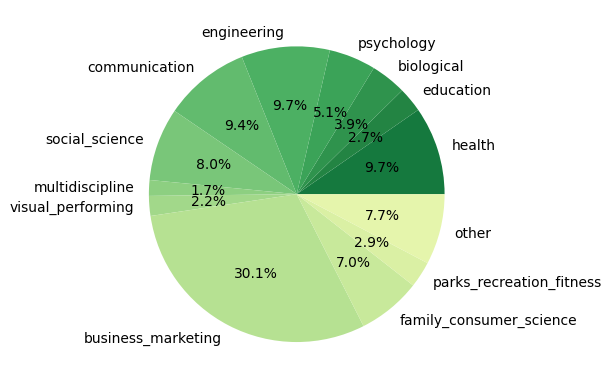

In [24]:
program_percentage_data = api_data['results'][0]['latest']['academics']['program_percentage']
programs = list(program_percentage_data.keys())
percentages = list(program_percentage_data.values())

smallest_percent_allowed = 0.015 # Any sector under this threshold will be added to "other"
small_slices = 0 # The number of slices below the threshold above

# Count the number of small slices
small_slices = sum(1 for i in percentages if i < smallest_percent_allowed)

# If there is more than one slice smaller than the threshold, combine those slices into "other"
if small_slices > 1:
    other_percentage = 0
    i = len(program_percentage_data)-1
    while i >= 0:
        if percentages[i] < smallest_percent_allowed:
            other_percentage += percentages[i]
            programs.pop(i)
            percentages.pop(i)
        i -= 1
    percentages.append(other_percentage)
    programs.append("other")

# Configure color of pie chart
cmap = plt.get_cmap('YlGn_r')
colors = cmap(np.linspace(0.2, 0.8, len(percentages)))

fig, ax = plt.subplots()
plt.pie(percentages, labels=programs, autopct='%1.1f%%', colors=colors)
# plt.title("Subagency Obligations of the " + agency_name)

plt.show()

In [ ]:
# Sort the dictionary by keys
sorted_program_percentage_data = dict(
    sorted(program_percentage_data.items(), key=lambda x: x[1], reverse=True)
)

# Print the sorted dictionary
for key, value in sorted_program_percentage_data.items():
    print(f'{key}: {value}')

business_marketing: 0.3011
health: 0.0966
engineering: 0.0966
communication: 0.0942
social_science: 0.0799
family_consumer_science: 0.0696
psychology: 0.0513
biological: 0.0389
parks_recreation_fitness: 0.0286
education: 0.0272
visual_performing: 0.0217
multidiscipline: 0.0172
computer: 0.0144
history: 0.0117
public_administration_social_service: 0.0109
physical_science: 0.0106
english: 0.0097
mathematics: 0.0089
language: 0.0045
resources: 0.0038
philosophy_religious: 0.0018
ethnic_cultural_gender: 0.0009
legal: 0
library: 0
military: 0
humanities: 0
agriculture: 0
architecture: 0
construction: 0
transportation: 0
personal_culinary: 0
science_technology: 0
precision_production: 0
engineering_technology: 0
security_law_enforcement: 0
communications_technology: 0
mechanic_repair_technology: 0
theology_religious_vocation: 0
